<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-addresses-space-clustering/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(12)

In [25]:
%run "/content/drive/MyDrive/ethereum-address-space-clustering/helper_functions.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/tsne_plotter.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/silhoutte_plotter.py"

<Figure size 640x480 with 0 Axes>

In [26]:
df = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/labeled_address_data.csv").drop(columns=['Unnamed: 0'])
df.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


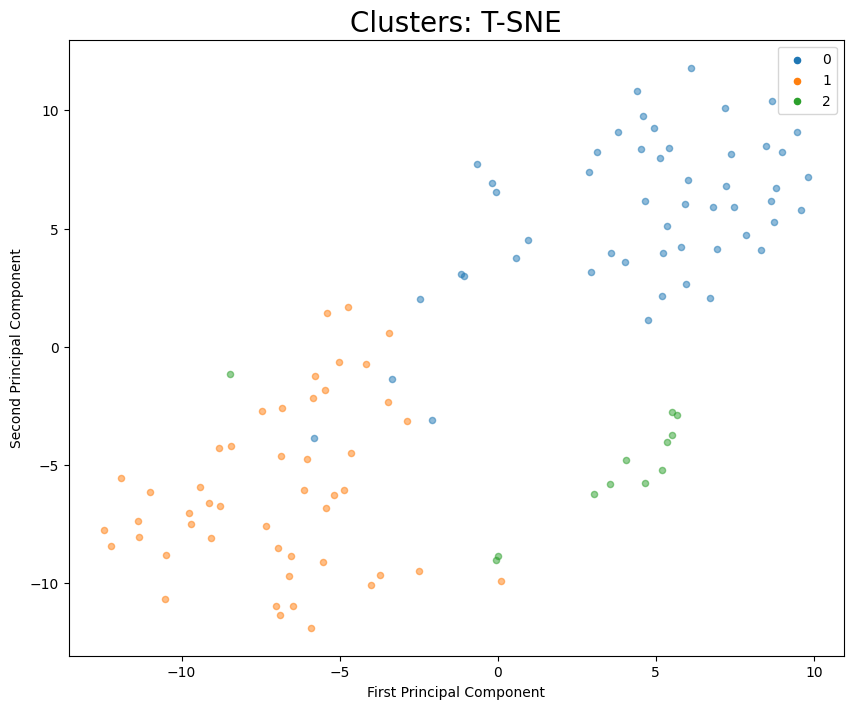

In [27]:
# Plot only labeled datapoints
labeled_addresses = df[df["Entity"].notnull()].iloc[:, 1:-2]
pipe, labeled_addresses = data_pipeline(labeled_addresses)
cl_labels = make_cluster(labeled_addresses, n_clusters=3, n_init=20, max_iter=500)
tsne_results_labels = calc_tsne(labeled_addresses, n_components=2, perplexity=20, n_iter=500, learning_rate=100)
plot_tsne(cl_labels.labels_, tsne_results_labels)

In [28]:
pipeline, processed_data = data_pipeline(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [29]:
tsne_results = calc_tsne(processed_data, n_components=2, perplexity=20, n_iter=500, learning_rate=100)

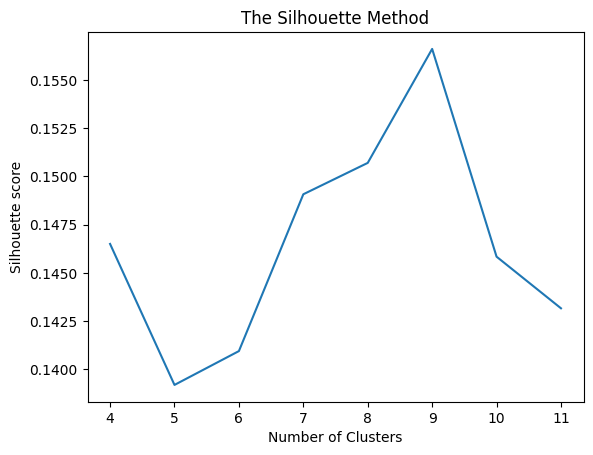

In [30]:
plot_silhouette_scores(processed_data, 4, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.1404371912993677


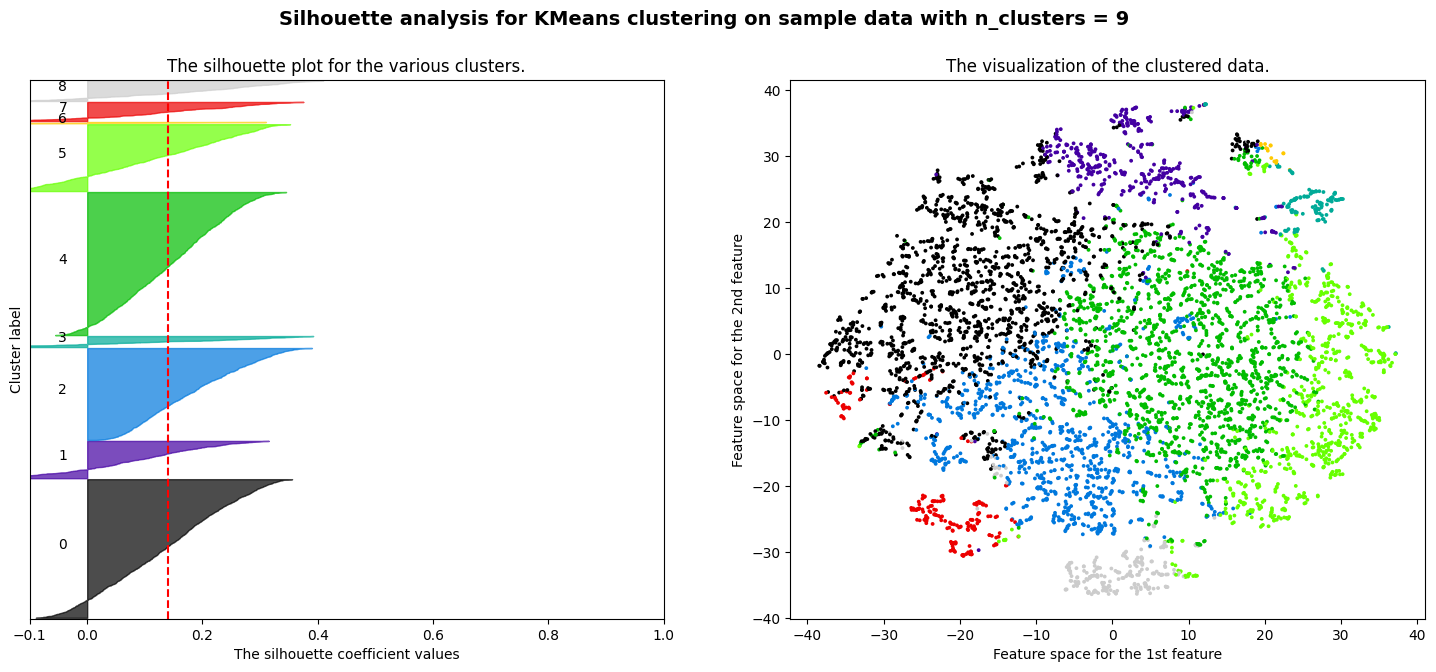

In [31]:
range_n_clusters = [9]
sils = silhouette_plotter(processed_data, range_n_clusters, tsne_results)

In [32]:
clusters = make_cluster(processed_data, n_clusters=9, n_init=20, max_iter=500)
print(np.unique(clusters.labels_))

[0 1 2 3 4 5 6 7 8]


In [33]:
dataset_with_clusters = assign_cluster_to_data(df, clusters.labels_)
dataset_with_clusters.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity,cluster
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange,2
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange,2
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange,2
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN,2
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN,2


In [34]:
dataset_with_clusters["cluster"].value_counts()

,count
cluster,
3,1723
1,1714
5,978
0,808
7,436
4,220
2,138
6,22
8,18


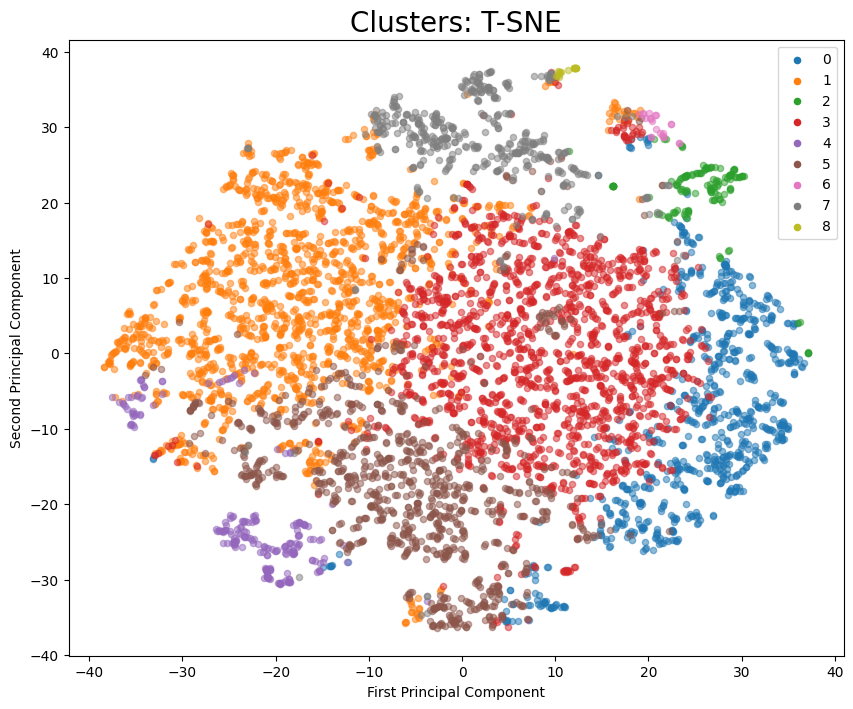

In [35]:
plot_tsne(clusters.labels_, tsne_results)

In [36]:
categories = ("Exchange", "Mining", "ICO Wallets")
colors = ("blue", "red", "green")

cluster_types = {}
for categ in categories:
    cluster_types[categ] = find_category_of_cluster(clusters, dataset_with_clusters, categ)

cl_types = list(cluster_types.values())

Exchange
Cluster num: 0, num of addresses: 3, cluster size: 808, lebel density: 0.3712871287128713
Cluster num: 1, num of addresses: 0, cluster size: 1714, lebel density: 0.0
Cluster num: 2, num of addresses: 44, cluster size: 138, lebel density: 31.88405797101449
Cluster num: 3, num of addresses: 1, cluster size: 1723, lebel density: 0.05803830528148578
Cluster num: 4, num of addresses: 0, cluster size: 220, lebel density: 0.0
Cluster num: 5, num of addresses: 0, cluster size: 978, lebel density: 0.0
Cluster num: 6, num of addresses: 4, cluster size: 22, lebel density: 18.181818181818183
Cluster num: 7, num of addresses: 1, cluster size: 436, lebel density: 0.22935779816513763
Cluster num: 8, num of addresses: 0, cluster size: 18, lebel density: 0.0
Mining
Cluster num: 0, num of addresses: 0, cluster size: 808, lebel density: 0.0
Cluster num: 1, num of addresses: 10, cluster size: 1714, lebel density: 0.5834305717619603
Cluster num: 2, num of addresses: 0, cluster size: 138, lebel den

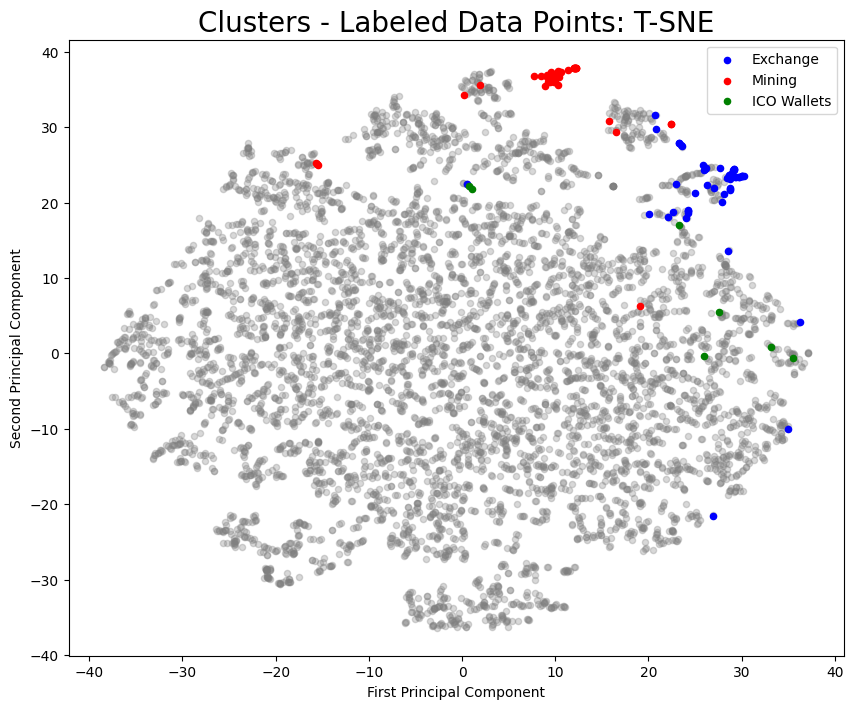

In [37]:
df_label = df[df["Entity"].notnull()]
df_label = df_label[["ethereum_address", "Entity"]]
plot_tsne_with_labels(tsne_results, df, df_label, categories, colors)

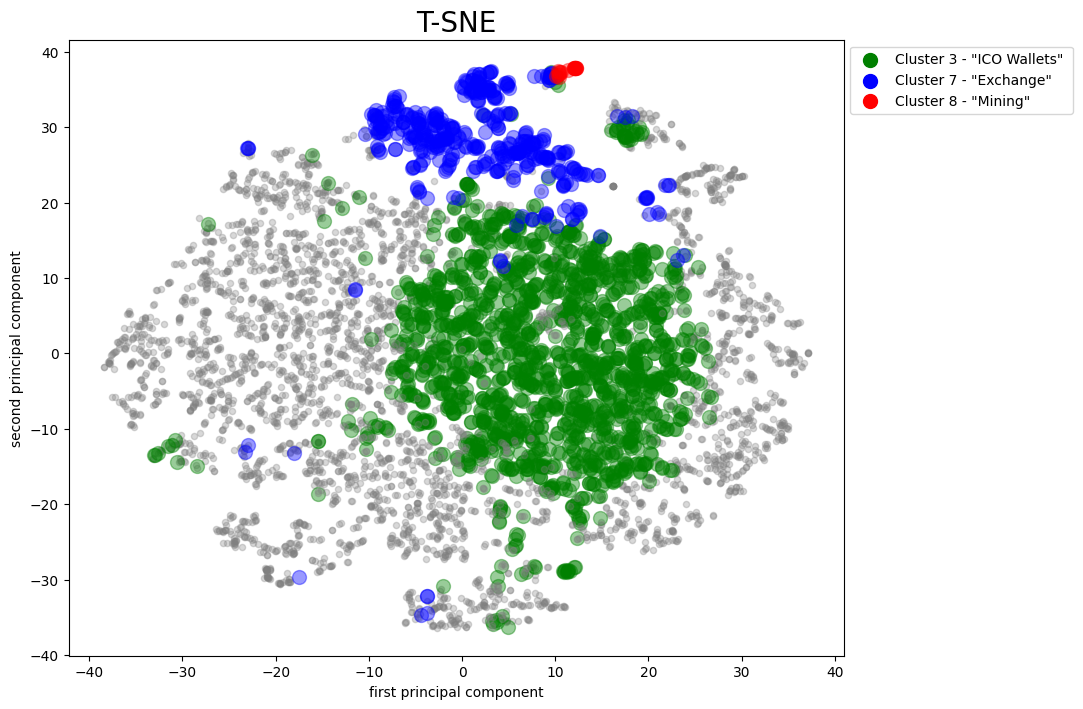

In [38]:
plot_tsne_with_labeled_clusters(tsne_results, clusters, cl_types, categories, colors)